In [1]:
def gaussian_filter(time, data):
    
    time_decimal_day = (time - np.min(time)).astype('timedelta64[s]').astype(np.float64) / (60.0*60.0*24.0)
        
    def inner_function(wavelength_in_days):
        
        def calculate_values(t0):
            tn = (time_decimal_day - t0) / wavelength_in_days
            i = np.where(np.logical_and(tn > -5, tn < 5))
            weights = np.exp(-0.5*np.power(tn[i],2))
            weights /= np.sum(weights)
            return np.sum(data[i]*weights)
    
        return np.vectorize(calculate_values)(time_decimal_day)
    
    return inner_function

In [2]:
from EddyData import EddyData
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as pplt

data = EddyData('data/HSL_data.csv')
data.filter_by_ustar(0.3)
data.denoise('co2_flux')
co2_ts = data.detrend('co2_flux')
t = data.time

In [3]:
gfilter = gaussian_filter(t, co2_ts)

In [4]:
logfrequencies = np.arange(-3, 0.5, 0.1)
stds = np.zeros_like(logfrequencies)

for i, logfrequency in enumerate(logfrequencies):
    wavelength = 1/np.power(10, logfrequency)
    stds[i] = np.std(gfilter(wavelength))
    print('Done with: ', np.power(10, logfrequency))
    

Done with:  0.001
Done with:  0.0012589254117941675
Done with:  0.001584893192461114
Done with:  0.0019952623149688807
Done with:  0.002511886431509582
Done with:  0.0031622776601683824
Done with:  0.003981071705534978
Done with:  0.00501187233627273
Done with:  0.006309573444801942
Done with:  0.00794328234724283
Done with:  0.010000000000000021
Done with:  0.012589254117941701
Done with:  0.015848931924611172
Done with:  0.01995262314968885
Done with:  0.025118864315095874
Done with:  0.03162277660168389
Done with:  0.03981071705534985
Done with:  0.0501187233627274
Done with:  0.06309573444801955
Done with:  0.07943282347242846
Done with:  0.10000000000000041
Done with:  0.12589254117941726
Done with:  0.15848931924611206
Done with:  0.1995262314968889
Done with:  0.25118864315095923
Done with:  0.31622776601683955
Done with:  0.39810717055349937
Done with:  0.501187233627275
Done with:  0.6309573444801969
Done with:  0.7943282347242863
Done with:  1.0000000000000062
Done with:  1.2

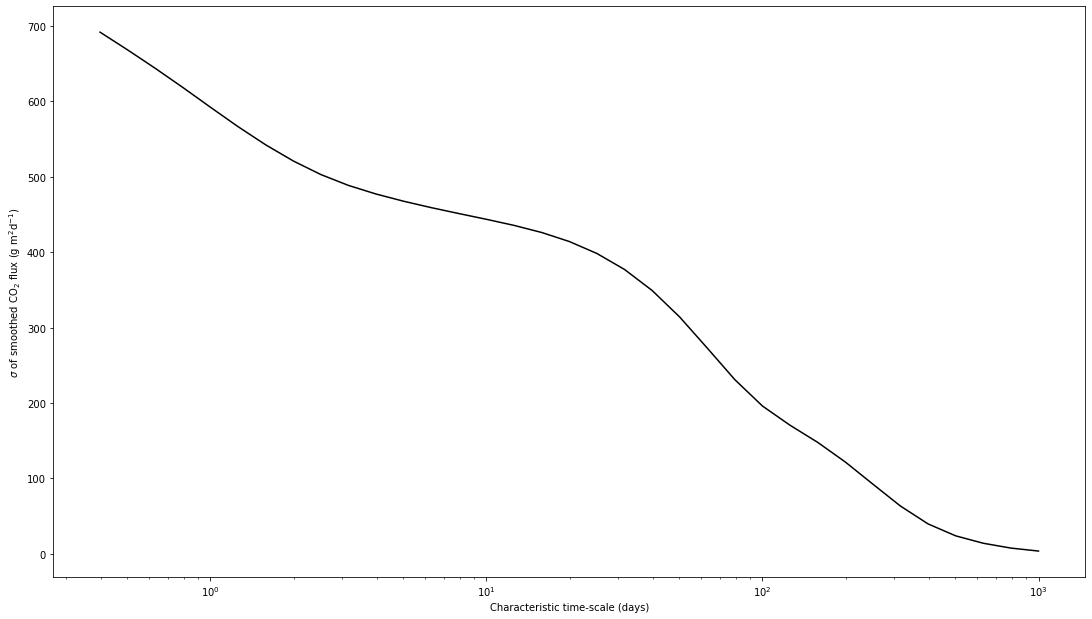

In [5]:
plt.semilogx(1/np.power(10,logfrequencies), stds, 'k-')
pplt.xlabel('Characteristic time-scale (days)')
pplt.ylabel("$\sigma$ of smoothed CO$_{2}$ flux (g m$^{2}$d$^{-1}$)")
plt.gcf().set_size_inches(18.5, 10.5)

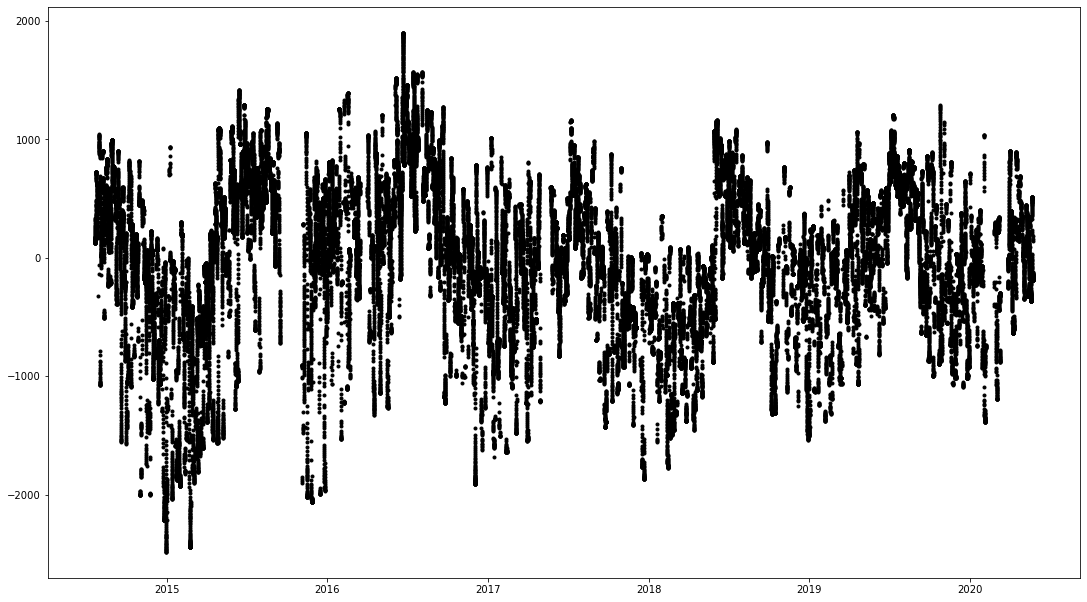

In [6]:
f = 2.0
plt.plot(t,gfilter(1/f),'k.')
plt.gcf().set_size_inches(18.5, 10.5)

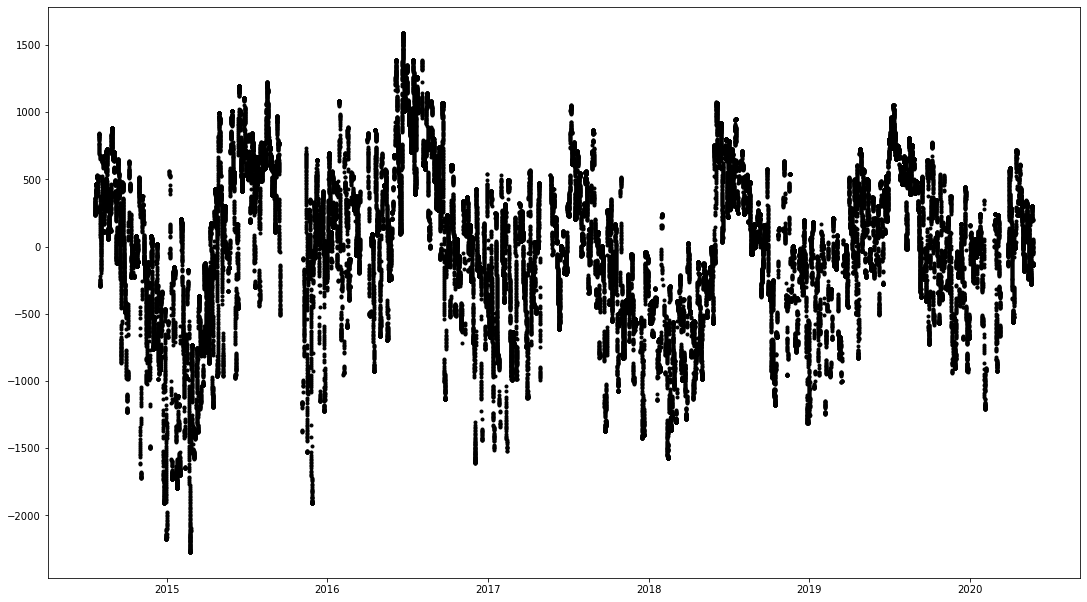

In [7]:
f = 1.0
plt.plot(t,gfilter(1/f),'k.')
plt.gcf().set_size_inches(18.5, 10.5)

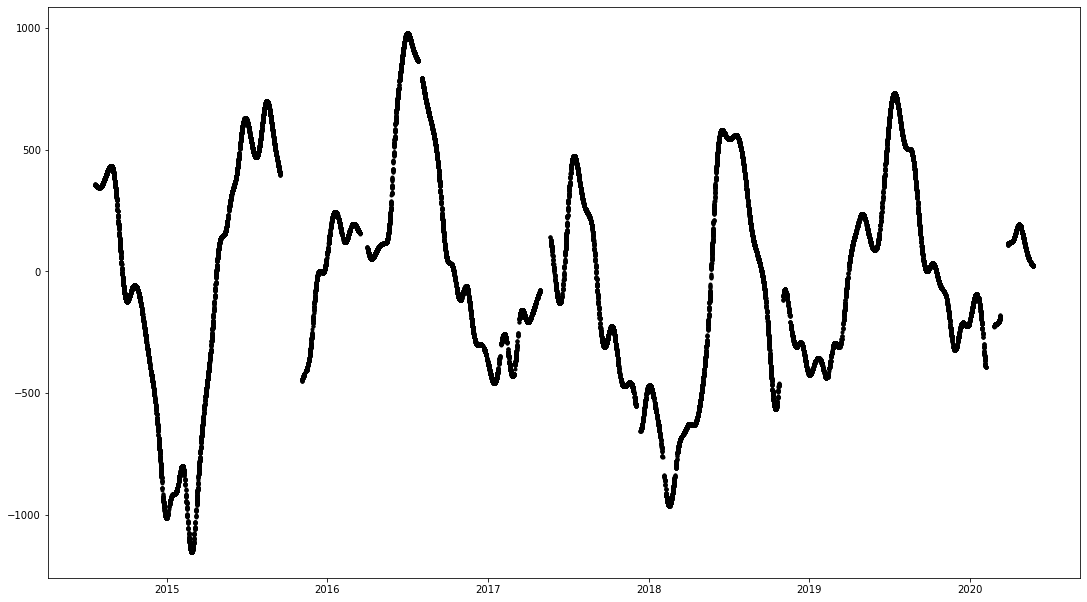

In [8]:
f = 0.1
plt.plot(t,gfilter(1/f),'k.')
plt.gcf().set_size_inches(18.5, 10.5)

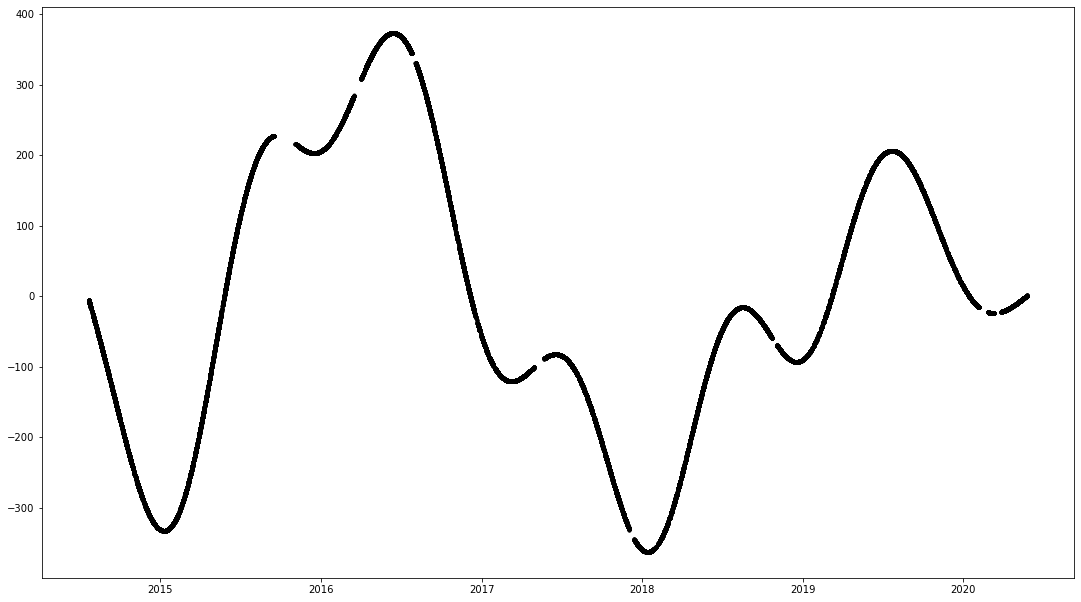

In [9]:
f = 0.01
plt.plot(t,gfilter(1/f),'k.')
plt.gcf().set_size_inches(18.5, 10.5)

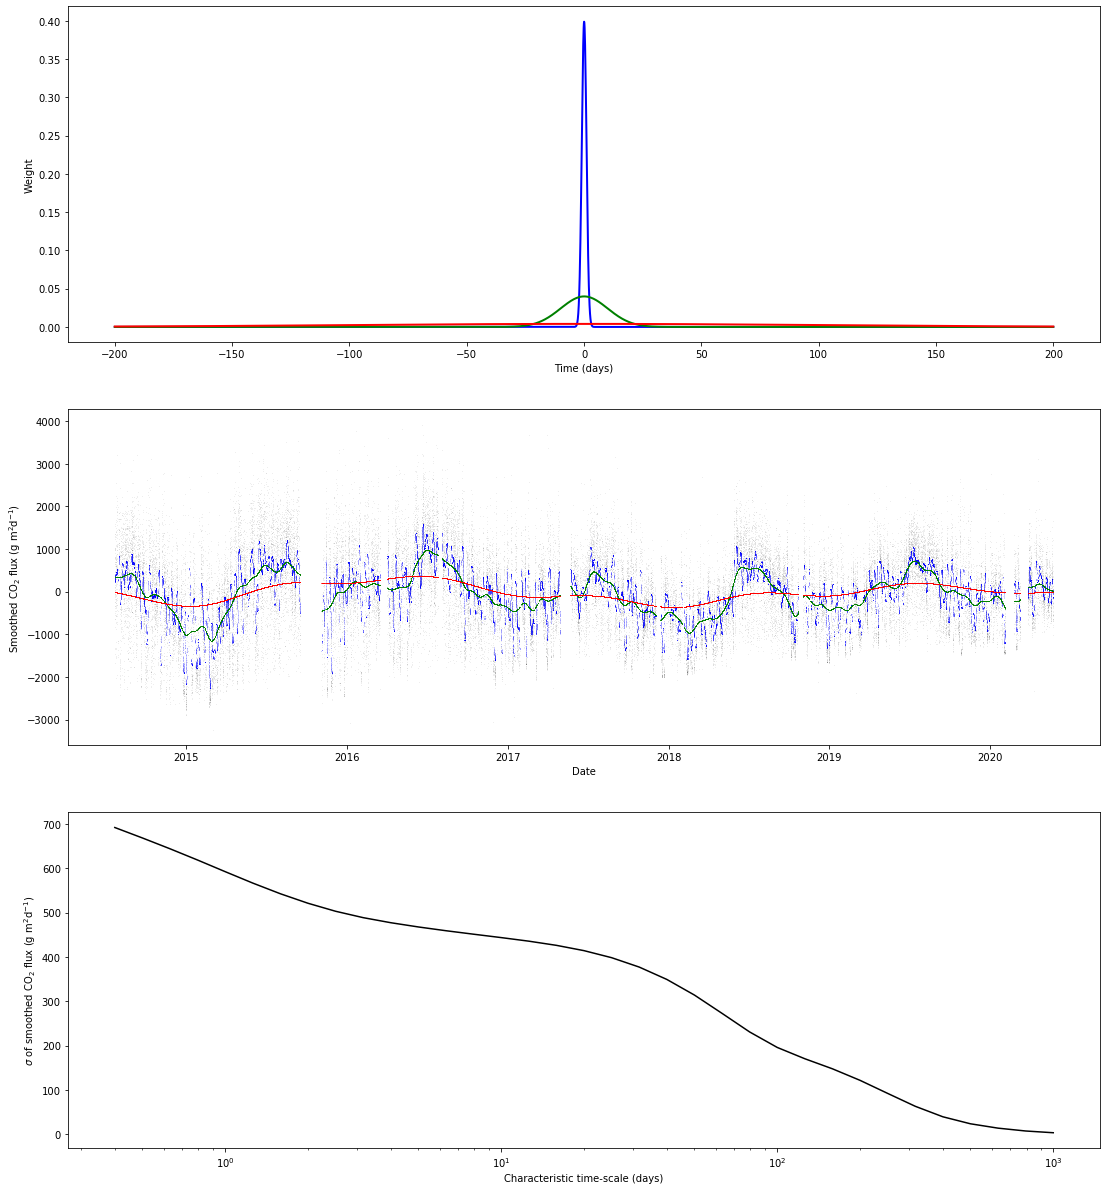

In [10]:
x = np.arange(-200,200,0.1)

def gaussian(sig):
    return 1 / (sig*np.sqrt(2*np.pi)) * np.exp(-0.5*np.power(x / sig,2))

fig = plt.figure()
plt.subplot(3,1,1)
plt.plot(x, gaussian(1.0), linestyle='-', color='b', linewidth=2.0)
plt.plot(x, gaussian(10.0), linestyle='-', color='g', linewidth=2.0)
plt.plot(x, gaussian(100.0), linestyle='-', color='r', linewidth=2.0)
pplt.xlabel('Time (days)')
pplt.ylabel("Weight")

plt.subplot(3,1,2)
plt.plot(t, co2_ts, 
         marker='o',
         markerfacecolor = 'k',
         fillstyle='full',
         markeredgewidth=0.0,
         markeredgecolor='None',
         linestyle='None',
         markersize=0.3)
plt.plot(t, gfilter(1.0), 
         marker='o',
         markerfacecolor = 'b',
         fillstyle='full',
         markeredgewidth=0.0,
         markeredgecolor='None',
         linestyle='None',
         markersize=0.5)
plt.plot(t, gfilter(10.0), 
         marker='o',
         markerfacecolor = 'g',
         fillstyle='full',
         markeredgewidth=0.0,
         markeredgecolor='None',
         linestyle='None',
         markersize=0.7)
plt.plot(t, gfilter(100.0), 
         marker='o',
         markerfacecolor = 'r',
         fillstyle='full',
         markeredgewidth=0.0,
         markeredgecolor='None',
         linestyle='None',
         markersize=0.9)
plt.xlabel('Date')
pplt.ylabel('Smoothed CO$_{2}$ flux (g m$^{2}$d$^{-1}$)')
plt.subplot(3,1,3)
plt.semilogx(1/np.power(10,logfrequencies), stds, 'k-')
pplt.xlabel('Characteristic time-scale (days)')
pplt.ylabel("$\sigma$ of smoothed CO$_{2}$ flux (g m$^{2}$d$^{-1}$)")
plt.gcf().set_size_inches(18.5, 21.0)
plt.savefig('NoiseAnalysisFigure.eps')